In [ ]:
from app import main


X,y = main()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3, svd_solver='full')
import numpy as np

In [ ]:
pca.fit(X/np.max(X))

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
pca.get_covariance()

In [ ]:
pca.explained_variance_[0]

In [ ]:
pca.components_

In [ ]:
X2 = pca.transform(X)

In [1]:
from gome_work_flow import *
cd = cdl_utils()
gome = GNOME_utils(cd)
g = Gome_workflow()


C:\Users\Bowen\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from datetime import date, timedelta
date_ = date(2016, 5,1)
prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
gome_path = convertGOMEDate(date_, prefix)

In [3]:
lon_belt = np.arange(-110, -70, 0.5)
lat_belt = np.arange(20, 45, 0.5)

lon_belt

array([-110. , -109.5, -109. , -108.5, -108. , -107.5, -107. , -106.5,
       -106. , -105.5, -105. , -104.5, -104. , -103.5, -103. , -102.5,
       -102. , -101.5, -101. , -100.5, -100. ,  -99.5,  -99. ,  -98.5,
        -98. ,  -97.5,  -97. ,  -96.5,  -96. ,  -95.5,  -95. ,  -94.5,
        -94. ,  -93.5,  -93. ,  -92.5,  -92. ,  -91.5,  -91. ,  -90.5,
        -90. ,  -89.5,  -89. ,  -88.5,  -88. ,  -87.5,  -87. ,  -86.5,
        -86. ,  -85.5,  -85. ,  -84.5,  -84. ,  -83.5,  -83. ,  -82.5,
        -82. ,  -81.5,  -81. ,  -80.5,  -80. ,  -79.5,  -79. ,  -78.5,
        -78. ,  -77.5,  -77. ,  -76.5,  -76. ,  -75.5,  -75. ,  -74.5,
        -74. ,  -73.5,  -73. ,  -72.5,  -72. ,  -71.5,  -71. ,  -70.5])

In [4]:
from mpl_toolkits.basemap import Basemap, cm
from numpy import meshgrid

[[110 110 110 ..., 110 110 110]
 [110 110 110 ..., 110 110 110]
 [110 110 110 ..., 110 110 110]
 ..., 
 [  3   4   5 ...,  50  51  52]
 [  2   3   4 ...,  49  50  51]
 [  1   2   3 ...,  48  49  50]]


C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


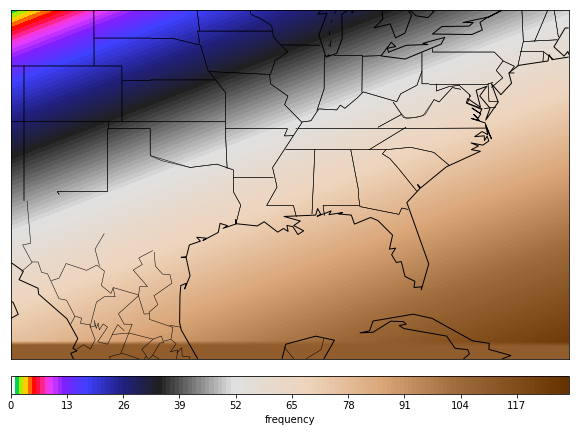

In [37]:
plt.figure(figsize=(10,10))
map = Basemap(llcrnrlon=-110,llcrnrlat=20,urcrnrlon=-70.,urcrnrlat=45.)
map.drawcoastlines()
map.drawstates()

# print(map.llcrnrx)
xx, yy = map.makegrid(50,80)

data = np.array([np.arange(50) - i + 80 for i in range(80)])
data[0:4, :] = 110
print(data)
clevs = np.arange(130)
map.contourf(xx,yy,data,clevs,cmap=cm.s3pcpn)
cbar = map.colorbar(location='bottom',pad="5%")
cbar.set_label('frequency')
plt.show()

In [6]:
round(3.1)

3

new 10 days window
newdate 2016-05-01
newdate 2016-05-02
[Errno 2] No such file or directory: b'E:\\SIF data\\GOME_2016\\GOME_2016\\05\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160502_v27_all.nc'
newdate 2016-05-03
newdate 2016-05-04
newdate 2016-05-05
newdate 2016-05-06
newdate 2016-05-07
newdate 2016-05-08
newdate 2016-05-09
newdate 2016-05-10


C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3683: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
C:\Users\Bowen\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3752: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


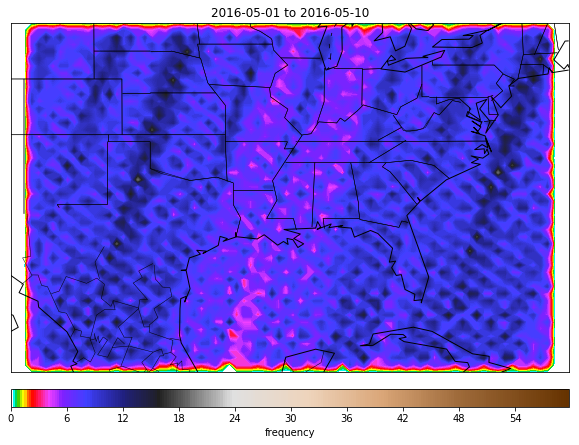

new 10 days window
newdate 2016-05-11
newdate 2016-05-12
newdate 2016-05-13
newdate 2016-05-14
newdate 2016-05-15
newdate 2016-05-16
[Errno 2] No such file or directory: b'E:\\SIF data\\GOME_2016\\GOME_2016\\05\\ret_f_nr5_nsvd12_v26_waves734_nolog.20160516_v27_all.nc'
newdate 2016-05-17
newdate 2016-05-18
newdate 2016-05-19
newdate 2016-05-20


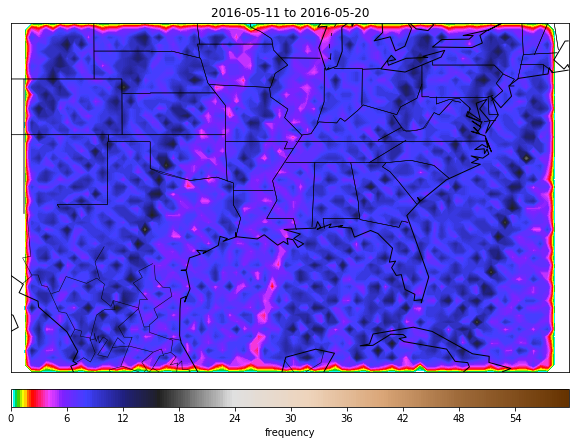

new 10 days window
newdate 2016-05-21
newdate 2016-05-22
newdate 2016-05-23
newdate 2016-05-24
newdate 2016-05-25
newdate 2016-05-26
newdate 2016-05-27
newdate 2016-05-28
newdate 2016-05-29
newdate 2016-05-30


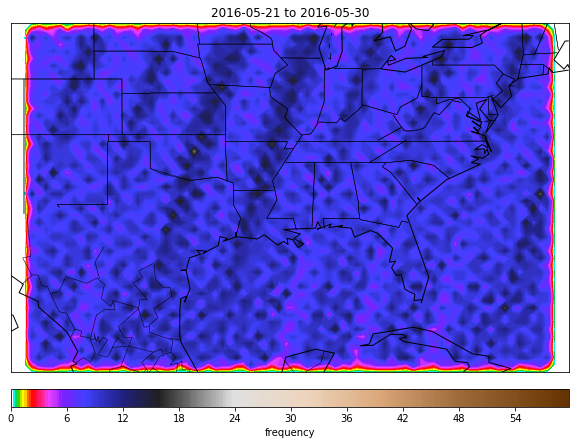

new 10 days window
newdate 2016-05-31
newdate 2016-06-01
newdate 2016-06-02
newdate 2016-06-03
newdate 2016-06-04
newdate 2016-06-05
newdate 2016-06-06
newdate 2016-06-07


In [ ]:
from math import floor

#initialize
gome.min_lon, gome.max_lon, gome.min_lat, gome.max_lat = -110, -70, 20, 45
prefix = 'E:\\SIF data\\GOME_2016\\GOME_2016\\'
date_ = date(2016, 5,1)
map = Basemap(llcrnrlon=-110,llcrnrlat=20,urcrnrlon=-70.,urcrnrlat=45.)
days = (date(2016, 8, 31) - date_).days
xx, yy = map.makegrid(80,50)
clevs = np.arange(240)/4

#workflow
for l in range(days//10):
    print('new 10 days window')
    footprint_mat = np.zeros((len(lat_belt), len(lon_belt)))
    for k in range(10):
        try:
            new_date = date_ + timedelta(l*10 + k)
            print('newdate', new_date)
            gome_path = convertGOMEDate(new_date, prefix)
            gome.load_gnome(gome_path, new_date)
            for lon,lat in zip(gome.lons, gome.lats):
                lon_integer, lat_integer, lon_round, lat_round = floor(lon), floor(lat), round(lon), round(lat)
                lon_index = int((lon_integer+110)*2 + lon_round - lon_integer)
                lat_index = int((lat_integer - 20)*2 + lat_round - lat_integer)
                footprint_mat[lat_index, lon_index] += 1
        except Exception as e:
            print(e)
            continue
            
    plt.figure(figsize=(10,10))
    map.drawcoastlines()
    map.drawstates()
    map.contourf(xx, yy, footprint_mat, clevs, cmap = cm.s3pcpn)
    cbar = map.colorbar(location='bottom',pad="5%")
    cbar.set_label('frequency')
    plt.title(str(date_ + timedelta(l*10)) + ' to '+ str(date_ + timedelta(l*10+9)))
    plt.show()
            
